# I. Mount Google Drive


To run `vnquant` package in google drive needs mounting to a google drive that store code and data inside. That enable Google colab 's Virtual Machine to execute our code and justify our data.   

![](https://imgur.com/kpeMAsi.png)

In [2]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Colab Notebooks/vnquant_tutorial"
%cd {path}
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/Colab Notebooks/vnquant_tutorial'
/content
gdrive	sample_data


# II. Install vnquant package

First, cloning [vnquant repository](https://github.com/phamdinhkhanh/vnquant) and installing it right in your mounted folder. After successful installation, DataScientists/AI Engineers are able to use `vnquant` to get data, visualization and execute financial analysis in your google colab runtime session.

In [3]:
!git clone https://github.com/phamdinhkhanh/vnquant
%cd vnquant
!python setup.py install

Cloning into 'vnquant'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 258 (delta 33), reused 56 (delta 19), pack-reused 185
Receiving objects: 100% (258/258), 1.03 MiB | 8.33 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/vnquant
running install
running bdist_egg
running egg_info
creating vnquant.egg-info
writing vnquant.egg-info/PKG-INFO
writing dependency_links to vnquant.egg-info/dependency_links.txt
writing requirements to vnquant.egg-info/requires.txt
writing top-level names to vnquant.egg-info/top_level.txt
writing manifest file 'vnquant.egg-info/SOURCES.txt'
writing manifest file 'vnquant.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/vnquant
copying vnquant/utils.py -> build/lib/vnquant
copying vnquant/__version__.py -> build/lib/vnquant
cop

In [4]:
%cd ..
!rm -rf vnquant
!ls

/content
gdrive	sample_data


test package

In [5]:
!pip freeze | grep vnquant

vnquant==0.1.1


In [6]:
import vnquant
vnquant.__version__

ModuleNotFoundError: ignored

# III. Introduction

The main features `vnquant` support you to progress were:

*   **Loading dataset**:
  *   Stock prices from `CAFE, VND` sources.
  *   Business prices: balance sheet, business, cashflow report.

*   **Visualization**:
  *   Candlestick charts of stock prices.
  *   Advanced stock indices: MACD, RSI, Stochastic.



## Loading price dataset

In [ ]:
import vnquant.data as dt

loader = dt.DataLoader(symbols="TCB",
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="cafe")

data = loader.download()
data.head()

Attributes,high,low,open,close,adjust,volume
Symbols,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,
2022-01-04,51.2,50.30,50.5,50.90,50.90,12054600
2022-01-05,51.2,50.30,50.9,50.50,50.50,11182100
2022-01-06,50.4,49.60,50.2,49.90,49.90,11308000
2022-01-07,50.1,49.40,49.9,49.45,49.45,8125200
2022-01-10,49.6,48.65,49.5,48.65,48.65,10828900


**Arguments**

* `symbols`: a string or list of strings indicates the stock symbols that regularly include 3 upper-case letters except for several special cases, which are compounded symbols, such as: `E1VFVN30, VN100-INDEX, HNX-INDEX, HNX30-INDEX, UPCOM-INDEX` in case your `data_source = "cafe"` and `VN30, HNX30, UPCOM` in case your `data_source = "vnd"`.
* `start`: start date time with format `yyyy-mm-dd`.
* `end`: end date time with format `yyyy-mm-dd`.
* `minimal`: default is True, we only clone `high, low, open, close, adjust price, volume` information. By contrast, more information is added likes `volumn_reconcile, volumn_match`
* `data_source`: website where clones the data. Currently, there are two main resources [VNDIRECT](https://trade.vndirect.com.vn/chung-khoan/danh-muc) and [CAFEF](https://liveboard.cafef.vn/) showed by `data_source = vnd` and `cafe`, respectively. The default is `vnd`.

In [ ]:
# If you want to get full dataset, change minimal = False
import vnquant.data as dt

loader = dt.DataLoader(symbols="TCB",
           start="2022-01-01",
           end="2022-10-01",
           minimal=False,
           data_source="cafe")

data = loader.download()
data.head()

Attributes,change_perc1,change_perc2,open,high,low,close,volume_match,volume_reconcile,adjust,value_match,value_reconcile,volume
Symbols,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB,TCB
date,,,,,,,,,,,,
2022-01-04,0.90,1.80,50.5,51.2,50.30,50.90,11334600,720000,50.90,577575000000,36720000000,12054600
2022-01-05,-0.40,-0.79,50.9,51.2,50.30,50.50,9569600,1612500,50.50,486079000000,80456375000,11182100
2022-01-06,-0.60,-1.19,50.2,50.4,49.60,49.90,10716700,591300,49.90,535719000000,28791100000,11308000
2022-01-07,-0.45,-0.90,49.9,50.1,49.40,49.45,7832200,293000,49.45,388457000000,15355900000,8125200
2022-01-10,-0.85,-1.72,49.5,49.6,48.65,48.65,8771400,2057500,48.65,431144000000,103642250000,10828900


Fortunately, `vnquant` support you clone `multiple stock indices` by listing out all of them in `symbols` argument in a list.

In [ ]:
import vnquant.data as dt

loader = dt.DataLoader(symbols=["TCB", "VCB"],
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="cafe")

data = loader.download()
data.head()

Attributes  high          low        open        close       adjust        \
Symbols      TCB   VCB    TCB   VCB   TCB   VCB    TCB   VCB    TCB   VCB   
date                                                                        
2022-01-04  51.2  79.4  50.30  78.0  50.5  79.0  50.90  79.0  50.90  79.0   
2022-01-05  51.2  80.4  50.30  78.0  50.9  79.0  50.50  78.0  50.50  78.0   
2022-01-06  50.4  79.9  49.60  77.9  50.2  78.6  49.90  79.1  49.90  79.1   
2022-01-07  50.1  79.9  49.40  78.2  49.9  79.6  49.45  79.8  49.45  79.8   
2022-01-10  49.6  79.9  48.65  78.5  49.5  79.7  48.65  79.5  48.65  79.5   

Attributes    volume           
Symbols          TCB      VCB  
date                           
2022-01-04  12054600  1133800  
2022-01-05  11182100  1692100  
2022-01-06  11308000  1215600  
2022-01-07   8125200   966200  
2022-01-10  10828900  1156000

To manipulate above dataframe, you should consider study pandas [DataFrame - tutorial - ML algorithms to practices book - phamdinhkhanh](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/index_pandas.html).

## Loading report dataset

`vnquant` advocate loading basic indexs such as: `ROA, ROE, Net Profit Marget, Net Revenue Growth, Profit After tax Growth`



In [ ]:
import vnquant.data as dt
loader = dt.FinanceLoader('TCB', '2018-06-02','2022-10-30', minimal=True)
data_basic = loader.get_basic_index()
data_basic.head()

,2021-12,2020-12,2019-12,2018-12
index,,,,
Tăng trưởng Doanh thu thuần 4 quý liền kề so với cùng kỳ năm trước,0.423834,0.315150,0.251793,0.275410
ROAE,0.215403,0.181615,0.177983,0.198433
ROAA,0.035859,0.030622,0.028639,0.028673
Tăng trưởng Vốn chủ sở hữu so với đầu năm,0.246958,0.202053,0.198716,0.922810


## Visualization

Visualization is a critical and important core functions of `vnquant` package. By visualization, quantitative experts/investors are able to analyze the trend and estimate which are suitable `bid and ask` points. Basic graph we are supplying now is candle-stick graph.

In [ ]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        show_advanced=['volume', 'macd', 'rsi'])

we could setup to only show several indices by `show_advanced` argument:

In [ ]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        show_advanced=['volume', 'rsi'])

/usr/local/lib/python3.7/dist-packages/vnquant-0.1.1-py3.7.egg/vnquant/plot/plot.py:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from vnquant import plot as pl
pl.vnquant_candle_stick(data='TCB',
                        title='TCB symbol from 2022-01-01 to 2022-10-01',
                        xlab='Date', ylab='Price',
                        start_date='2022-01-01',
                        end_date='2022-10-01',
                        show_advanced=['volume', 'macd'])

Thanks [Ha Anh Nguyen](https://www.facebook.com/nguyenhaanh.95) to join with me in computing advanced metrics.

## Data by industry

`vnquant` also support to get stock price according to industry based on industry code.

For example, to find all index in the same industry with `TCB`:

In [ ]:
from vnquant import utils
meta = utils.get_ind_class(code_list=["TCB"])

BASE_URL:  https://finfo-api.vndirect.com.vn/v4/industry_classification
payload_str:  q=codeList:TCB~industryCode:~industryLevel:~higherLevelCode:~englishName:~vietnameseName:&size=9999
header:  {'content-type': 'application/json', 'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.41 Safari/537.36'}


**Arguments**:
* `code_list`: list of str - tickers
* `industry_codes`: list of str - industry codes
* `industry_levels`: list of str - industry levels
* `higher_level_codes`: list of str - higher industry level's codes
* `english_name`: str - part of the industry's English name to query for
* `vietnamese_name`: str - part of the industry's Vietnamese name to query for
* `result_size`: int - the number of industry to include on 1 result page


The result returns would be a `codeList` according to their level. High level is more specific sectors.

In [ ]:
meta['data']

[{'industryCode': '8300',
  'industryLevel': '2',
  'higherLevelCode': '8000',
  'englishName': 'Banks',
  'vietnameseName': 'Ngân hàng',
  'totalCount': 27.0,
  'codeList': 'STB,LPB,BVB,MSB,VPB,TPB,MBB,BID,SGB,VCB,VAB,VIB,OCB,HDB,NVB,NAB,KLB,TCB,BAB,ABB,SSB,VBB,EIB,PGB,SHB,CTG,ACB'},
 {'industryCode': '8350',
  'industryLevel': '3',
  'higherLevelCode': '8300',
  'englishName': 'Banks',
  'vietnameseName': 'Ngân hàng',
  'totalCount': 27.0,
  'codeList': 'STB,LPB,BVB,MSB,VPB,TPB,MBB,BID,SGB,VCB,VAB,VIB,OCB,HDB,NVB,NAB,KLB,TCB,BAB,ABB,SSB,VBB,EIB,PGB,SHB,CTG,ACB'},
 {'industryCode': '8355',
  'industryLevel': '4',
  'higherLevelCode': '8350',
  'englishName': 'Banks',
  'vietnameseName': 'Ngân hàng',
  'totalCount': 27.0,
  'codeList': 'STB,LPB,BVB,MSB,VPB,TPB,MBB,BID,SGB,VCB,VAB,VIB,OCB,HDB,NVB,NAB,KLB,TCB,BAB,ABB,SSB,VBB,EIB,PGB,SHB,CTG,ACB'},
 {'industryCode': '8000',
  'industryLevel': '1',
  'englishName': 'FINANCIALS ',
  'vietnameseName': 'Tài chính',
  'totalCount': 232.0,
  'c

Based on `codeList` you can clone dataset belongs to one industry.

In [ ]:
import random
# randomly get 5 symbols in `Banks` sector:
codeList = meta['data'][1]['codeList'].split(',')
random.shuffle(codeList)
# codeList5 = codeList[:5] 
codeList5 = ['VCB', 'VBB', 'HDB', 'SSB', 'MBB']
codeList5

['VCB', 'VBB', 'HDB', 'SSB', 'MBB']

Clone dataset of this code list in 2022

In [ ]:
import vnquant.data as dt

loader = dt.DataLoader(symbols=codeList5,
           start="2022-01-01",
           end="2022-10-01",
           minimal=True,
           data_source="vnd")

data = loader.download()
data.head()

Attributes  high                             low                             \
Symbols      VCB   VBB    HDB   SSB    MBB   VCB   VBB    HDB    SSB    MBB   
date                                                                          
2022-01-04  79.4  19.2  31.75  45.9  29.40  78.0  18.6  31.00  44.95  29.05   
2022-01-05  80.4  19.3  31.25  45.6  29.15  78.0  18.6  30.50  44.25  28.65   
2022-01-06  79.9  19.1  31.05  44.2  28.60  77.9  17.9  29.95  42.60  28.15   
2022-01-07  79.9  18.4  30.85  43.8  28.85  78.2  18.0  30.25  41.80  28.30   
2022-01-10  79.9  18.5  30.60  42.3  28.75  78.5  18.0  29.60  40.10  28.10   

Attributes  ...    avg                                  volume            \
Symbols     ...    VCB     VBB    HDB    SSB    MBB        VCB       VBB   
date        ...                                                            
2022-01-04  ...  78.86  19.041  31.38  45.59  29.19  1133800.0   96094.0   
2022-01-05  ...  78.88  18.808  30.70  44.97  28.80  1692100.0   52098.0   
2022-01-06  ...  78.88  18.134  30.28  43.35  28.37  1215600.0  140443.0   
2022-01-07  ...  79.09  18.090  30.47  42.44  28.53   966200.0   54344.0   
2022-01-10  ...  79.14  18.086  29.96  40.80  28.40  1156000.0   45988.0   

Attributes                                    
Symbols           HDB        SSB         MBB  
date                                          
2022-01-04  6809800.0  2208100.0   9072900.0  
2022-01-05  6841200.0  1891900.0   9114900.0  
2022-01-06  6998000.0  2666600.0  10895000.0  
2022-01-07  4097600.0  2220900.0   9526200.0  
2022-01-10  6013700.0  2225900.0   8933100.0  

[5 rows x 30 columns]

Visualize stock prices of this company during 2022.

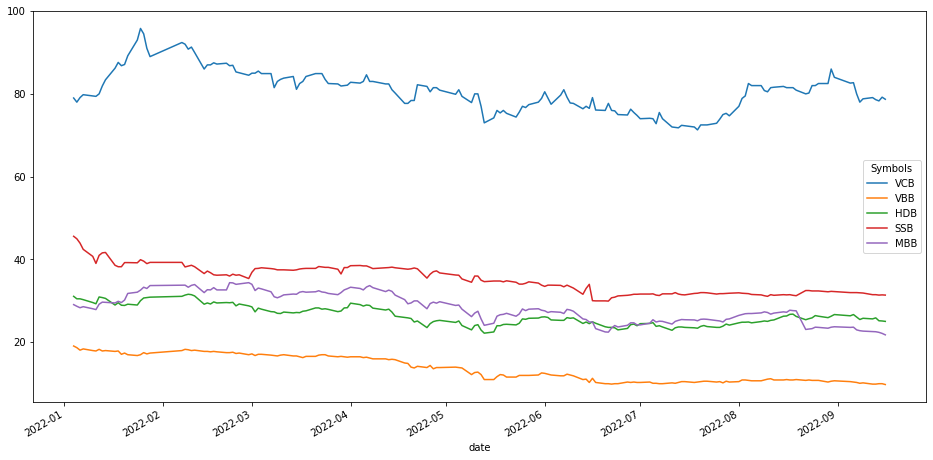

In [ ]:
data['close'].plot(figsize = (16, 8))

Thanks [Viet Anh Tran](https://www.facebook.com/vietzerg) to join with me doing this feature.

# VI. Quantitative analysis

## Compute daily return

In [ ]:
import numpy as np

df_return = np.log(data['close']/data['close'].shift(1))
df_return.dropna(inplace=True)
df_return.head()

Symbols,VCB,VBB,HDB,SSB,MBB
date,,,,,
2022-01-05,-0.012739,-0.021165,-0.019481,-0.013245,-0.013841
2022-01-06,0.014004,-0.032612,0.000000,-0.023610,-0.012270
2022-01-07,0.008811,0.016439,-0.006579,-0.034726,0.008780
2022-01-10,-0.003766,-0.021979,-0.023373,-0.040871,-0.017637
2022-01-11,-0.001259,-0.005571,-0.010187,-0.042613,-0.007143


## Descriptive statistic

In [ ]:
df_return.describe()

Symbols,VCB,VBB,HDB,SSB,MBB
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,-0.000022,-0.003857,-0.001250,-0.002157,-0.001670
std,0.017197,0.025805,0.020683,0.018581,0.026007
min,-0.053346,-0.123233,-0.066249,-0.123498,-0.177983
25%,-0.009315,-0.012579,-0.010449,-0.006601,-0.010084
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.008811,0.009217,0.009931,0.003155,0.011030
max,0.047331,0.092659,0.064539,0.048729,0.066822


## EDA (Exploratory Data Analysis)


In [ ]:
# !pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install -U pandas-profiling

In [ ]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df_return, title='Banking return report')
# profile.to_file(output_file="name of html file.html") 
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Estimate confident interval

Set: $r_t = \log(\frac{X_t}{X_{t-1}})$

$x_t = \frac{r_t-\bar{r}}{\sigma_{r}}$ will follow `Student's t` with $n-1$ degree. 

In [ ]:
import scipy.stats as st

# create 95% confidence interval
for sym in codeList5:
  rt = df_return[sym].dropna()
  interval = st.t.interval(alpha=0.95, df=df_return.shape[0]-1,
                loc=np.mean(rt),
                scale=st.sem(rt))
  print('95% confidence interval of {} is {}'.format(sym, interval))

95% confidence interval of VCB is (-0.0026026987691483198, 0.0025587138322273454)
95% confidence interval of VBB is (-0.007729598043898009, 1.5078397932013262e-05)
95% confidence interval of HDB is (-0.0043542379432952305, 0.0018532669415112443)
95% confidence interval of SSB is (-0.004945038736793793, 0.0006317459783414022)
95% confidence interval of MBB is (-0.005572182184578825, 0.0022331277986550836)


## Hypothesis testing:


### Augmented Dickey-Fuller Unit Root Test

Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

_Assumptions_

* Observations in are temporally ordered.

_Interpretation_

* H0: a unit root is present (series is non-stationary).
* H1: a unit root is not present (series is stationary).

In [ ]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
stat, p, lags, obs, crit, t = adfuller(df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-10.524, p=0.000
Probably Stationary


### Normality test
_Shapiro-Wilk Test_

Tests whether a data sample has a Gaussian distribution.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).

_Interpretation_

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

Python Code

In [ ]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.984, p=0.050
Probably Gaussian


### Correlation test

**Pearson’s Correlation Coefficient**

Tests whether two samples have a linear relationship.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

_Interpretation_

* H0: the two samples are independent.
* H1: there is a dependency between the samples.

Python Code

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(df_return['VCB'], df_return['MBB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.404, p=0.000
Probably dependent


### Parametric Statistical Hypothesis Tests

#### Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

*Assumptions*

* Observations in each sample are independent and 
* identically distributed (iid).
* Observations in each sample are normally distributed.
* Observations in each sample have the same variance.

*Interpretation*

* H0: the means of the samples are equal.
* H1: one or more of the means of the samples are unequal.

For example: Check whether mean return of `VBB` and `VCB` are equal?

$$\begin{split}
\left\{
\begin{matrix}
H_0: r_{VBB} = r_{VCB} \\
H1: r_{VBB} \neq r_{VCB}
\end{matrix}
\right.\end{split}
$$

In [ ]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(df_return['VBB'], df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.646, p=0.105
Probably the same distribution


### Nonparametric Statistical Hypothesis Tests

#### Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

_Assumptions_

* Observations in each sample are independent and identically distributed (iid).
* Observations in each sample can be ranked.
* Observations across each sample are paired.

_Interpretation_

* H0: the distributions of both samples are equal.
* H1: the distributions of both samples are not equal.

Python Code

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
stat, p = wilcoxon(df_return['VBB'], df_return['VCB'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=6149.000, p=0.105
Probably the same distribution
